#CLUSTER

In [0]:
pip install torch gwpy lalsuite Pycbc

     |████████████████████████████████| 1.4MB 2.3MB/s 
     |████████████████████████████████| 29.0MB 109kB/s 
     |████████████████████████████████| 3.2MB 43.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 1.6MB 35.9MB/s 
     |████████████████████████████████| 798kB 43.0MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 2.7MB 43.6MB/s 
  Created wheel for Pycbc: filename=PyCBC-1.15.6-cp36-cp36m-linux_x86_64.whl size=5685162 sha256=98ee947875278055bd9c1f67934255a8450123a8dee093f0847b835054925a5f
  Stored in directory: /root/.cache/pip/wheels/a4/02/25/95f4d2bcd567c5db2f1769519682b15a921fe5cf142f00a5ce
Successfully built Pycbc
  Created wheel for ligo-segments: filename=ligo_segments-1.2.0-cp36-cp36m-linux_x8

In [0]:
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
from tqdm import tqdm
#-------------------------
#       Deep learning
import torch.nn as nn 
import torch 
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
#---Data reading and writing---------------
import csv
import h5py
import pandas as pd
from scipy import signal
import scipy.io.wavfile as s


In [0]:
#-------------------------
# DEFINING VARIABLES
#--------------------------
signal_gw=np.zeros((20000,16384))
next_val=0

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
next_val=0
#------------------------------------------------------------------
#                    TRAINING DATASETS PREPRATION               ---
#------------------------------------------------------------------

class dataprep_train:

#------------------------------------------------------------------
#                    SIMULATED SIGNALS+TRANSIENT NOISE
#------------------------------------------------------------------
  def simulated_signals(noise1,noise2,noise3,noise4):  
    global next_val,signal_gw
    
    #------------------------parameters------------------------------
    apx=['TaylorT1', 'TaylorT2', 'SpinTaylorT4', 'SpinTaylorT5']#,'EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2','IMRPhenomB']
    check=np.zeros(len(noise1))
    left=0
    len_apx=len(apx)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for a in tqdm(range(len_apx)):
        check=np.zeros(len(noise1))
        k=0
        if apx=='TaylorT1':
          for m1 in range(5,50,5):
            for m2 in range(50,200,5):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)

        elif apx=='TaylorT2':
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    
        elif apx=='SpinTaylorT4' or apx=='SpinTaylorT5':
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      spin1x=np.random.rand(1),spin1y=np.random.rand(1),spin1z=np.random.rand(1),
                                      spin2x=np.random.rand(1),spin2y=np.random.rand(1),spin2z=np.random.rand(1),
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
          
        elif apx=='EOBNRv2' or apx=='SEOBNRv1' or apx=='SEOBNRv2':
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
        else:
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    len_hp=len(hp)
                    signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
                    if len_hp<=16385 :
                      pos=np.random.randint(0,len(noise1)-len(hp))
                      signal_gw[next_val:next_val+4,pos:pos+len(hp)]+=hp
                      writer = csv.writer(file)
                      writer.writerow([11,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                      writer.writerow([11,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                      writer.writerow([11,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                      writer.writerow([11,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                    k=k+1
                    next_val+=4
  

#------------------------------------------------------------------
#                    ECHOES +TRANSIENT NOISE
#------------------------------------------------------------------
  def echoes(noise1,noise2,noise3,noise4):
    global next_val,signal_gw
    signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for loop in range(50):
        t=np.linspace(0,.3,np.random.randint(16384))
        y1,y2=np.zeros(len(t)),np.zeros(len(t))
        i=0
        y=np.zeros(len(t))
        for j in range(0,np.random.randint(8)):
          for i in range(len(t)):
            aa=t[i]-0.0295-j*0.0295
            y1[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*250*aa)
        r=.3
        for j in range(0,np.random.randint(8)):
          for i in range(len(t)):
            aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
            y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*250*aa)
        pos=np.random.randint(0,len(noise1)-len(t))
        signal_gw[next_val:next_val+4,pos:pos+len(t)]+=y1
        next_val=next_val+4
        writer = csv.writer(file)
        writer.writerow([12,0,0,0,550,550,0,0,0,.5,0,.5])
        writer.writerow([12,0,0,0,250,250,0,0,0,.5,0,.5])
        writer.writerow([12,0,0,0,250,250,0,0,0,.5,0,.5])
        writer.writerow([12,0,0,0,250,250,0,0,0,.5,0,.5])
        signal_gw[next_val:next_val+4,pos:pos+len(t)]+=y2
        next_val=next_val+4
        writer = csv.writer(file)
        writer.writerow([12,0,0,0,550,550,0,0,0,.5,0,.5])
        writer.writerow([12,0,0,0,250,250,0,0,0,.5,0,.5])
        writer.writerow([12,0,0,0,250,250,0,0,0,.5,0,.5])
        writer.writerow([12,0,0,0,250,250,0,0,0,.5,0,.5])

#------------------------------------------------------------------
#                    GLITCHES+TRANSIENT NOISE
#------------------------------------------------------------------
  def glitches(noise1,noise2,noise3,noise4):
    global next_val,signal_gw
    signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for i in ['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']:
        loc='gdrive/My Drive/GW data/Glitches/'+i+'.wav'
        rate,data=s.read(loc)
        for c1 in range(5,9):
          for c2 in range(3,13,2):
            b, a = signal.butter(c1, .9, btype='lowpass', analog=False)
            low_passed = signal.filtfilt(b, a, data)
            y = 10e-28*signal.medfilt(low_passed,c2)
            k=np.zeros(8820)
            j=0
            for i in range(0,len(y),5):
              k[j]=y[i]
              j+=1
            pos=np.random.randint(0,len(noise1)-len(k))
            signal_gw[next_val:next_val+4,pos:pos+len(k)]+=k
            next_val=next_val+4
            writer = csv.writer(file)
            writer.writerow([13,0,0,0,550,550,0,0,0,.5,0,.5])
            writer.writerow([13,0,0,0,250,250,0,0,0,.5,0,.5])
            writer.writerow([13,0,0,0,250,250,0,0,0,.5,0,.5])
            writer.writerow([13,0,0,0,250,250,0,0,0,.5,0,.5])

#------------------------------------------------------------------------------
#                             CCSNe+Transient Noise               -------------
#------------------------------------------------------------------------------
  def ccsne(noise1,noise2,noise3,noise4):
    global next_val,signal_gw
    signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat','signal_A1B2G1_R.dat','signal_A1B3G1_R.dat','signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for k in val:
        loc='gdrive/My Drive/GW data/CCSNe/'+k
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        y = 10e-24*y
        k=np.zeros(16000)
        j=0
        for i in range(0,len(y),10):
          k[j]=y[i]
          j+=1
        pos=np.random.randint(0,len(noise1)-len(k))
        signal_gw[next_val:next_val+4,pos:pos+len(k)]+=k
        writer = csv.writer(file)
        writer.writerow([14,0,0,0,550,550,0,0,0,.5,0,.5])
        writer.writerow([14,0,0,0,250,250,0,0,0,.5,0,.5])
        writer.writerow([14,0,0,0,250,250,0,0,0,.5,0,.5])
        writer.writerow([14,0,0,0,250,250,0,0,0,.5,0,.5]) 
        next_val=next_val+4     

#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_BHBNSB(noise1,nosi2,nosie3,noise4):
    global next_val,signal_gw
    uid=20
    #------------------------parameters------------------------------
    apx=['TaylorT1', 'TaylorT2', 'SpinTaylorT4', 'SpinTaylorT5']#,'EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2','IMRPhenomB']
    check=np.zeros(len(noise1))
    left=0
    len_apx=len(apx)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for a in tqdm(range(len_apx)):
        check=np.zeros(len(noise1))
        k=0
        if apx=='TaylorT1':
          for m1 in range(5,50,5):
            for m2 in range(50,200,5):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)

        elif apx=='TaylorT2':
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    
        elif apx=='SpinTaylorT4' or apx=='SpinTaylorT5':
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      spin1x=np.random.rand(1),spin1y=np.random.rand(1),spin1z=np.random.rand(1),
                                      spin2x=np.random.rand(1),spin2y=np.random.rand(1),spin2z=np.random.rand(1),
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
          
        elif apx=='EOBNRv2' or apx=='SEOBNRv1' or apx=='SEOBNRv2':
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
        elif apx=='IMRPhenomB':
          for m1 in range(5,19,2):
            for m2 in range(5,19,2):
              for d in range(10,1001,50):
                for fl in [30,60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    len_hp=len(hp)
                    if len_hp<=16384:

                      for loops in range(50):
                        t=np.linspace(0,.3,np.random.randint(16384))
                        y2=np.zeros(len(t))          
                        r=.3
                        for j in range(0,np.random.randint(8)):
                          for i in range(len(t)):
                            aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
                            y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*250*aa)

                        for i in ['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']:
                          loc='gdrive/My Drive/GW data/Glitches/'+i+'.wav'
                          rate,data=s.read(loc)
                          for c1 in range(5,9):
                            for c2 in range(3,9,2):
                              b, a = signal.butter(c1, .9, btype='lowpass', analog=False)
                              low_passed = signal.filtfilt(b, a, data)
                              y = 10e-28*signal.medfilt(low_passed,c2)
                              k=np.zeros(8820)
                              j=0
                              for i in range(0,len(y),5):
                                k[j]=y[i]
                                j+=1
                              signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
                              next_val+=4
                              pos=np.random.randint(0,len(noise1)-len(hp)) 
                              signal_gw[next_val:next_val+4,pos:pos+len(hp)]+=hp 
                              pos=np.random.randint(0,len(noise1)-len(y2))
                              signal_gw[next_val:next_val+4,pos:pos+len(y2)]+=y2
                              pos=np.random.randint(0,len(noise1)-len(k))
                              signal_gw[next_val:next_val+4,pos:pos+len(k)]+=k                              
                              writer = csv.writer(file)
                              writer.writerow([21,0,0,0,550,550,0,0,0,.5,0,.5])
                              writer.writerow([21,0,0,0,250,250,0,0,0,.5,0,.5])
                              writer.writerow([21,0,0,0,250,250,0,0,0,.5,0,.5])
                              writer.writerow([21,0,0,0,250,250,0,0,0,.5,0,.5])                                




#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_CCSNe(noise1,nosi2,nosie3,noise4):
    global next_val,signal_gw
    
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat','signal_A1B2G1_R.dat','signal_A1B3G1_R.dat','signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for k in val:
        loc='gdrive/My Drive/GW data/CCSNe/'+k
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        y = 10e-24*y
        sig=np.zeros(16000)
        j=0
        for i in range(0,len(y),10):
          sig[j]=y[i]
          j+=1
        for i in ['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']:
          loc='gdrive/My Drive/GW data/Glitches/'+i+'.wav'
          rate,data=s.read(loc)
          for c2 in [5,7]:
            b, a = signal.butter(7, .9, btype='lowpass', analog=False)
            low_passed = signal.filtfilt(b, a, data)
            y = 10e-28*signal.medfilt(low_passed,c2)
            k=np.zeros(8820)
            j=0
            for i in range(0,len(y),5):
              k[j]=y[i]
              j+=1
            signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)  
            next_val+=4
            pos=np.random.randint(0,len(noise1)-len(sig)) 
            signal_gw[next_val:next_val+4,pos:pos+len(sig)]+=sig 
            pos=np.random.randint(0,len(noise1)-len(k))
            signal_gw[next_val:next_val+4,pos:pos+len(k)]+=k                              
            writer = csv.writer(file)
            writer.writerow([22,0,0,0,550,550,0,0,0,.5,0,.5])
            writer.writerow([22,0,0,0,250,250,0,0,0,.5,0,.5])
            writer.writerow([22,0,0,0,250,250,0,0,0,.5,0,.5])
            writer.writerow([22,0,0,0,250,250,0,0,0,.5,0,.5])    



#----------------------------------------------------------------------------------
#                               PIPELINES                                       ---
#----------------------------------------------------------------------------------
def train_pipeline(noise1,noise2,noise3,noise4):
  global next_val,signal_gw
  val=dataprep_train
  with open('gdrive/My Drive/GW data/labels.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id','m1','m2','d','fl','fu','NS-NS','BH-BH','BH-NS','ringdown','glitch','noise'])
  print('\nSimulated GW .......')    
  val.simulated_signals(noise1,noise2,noise3,noise4)
  print('\nSimulated GW training set 100%')
  print('data size :'+ str(next_val)+'\n\n')  
  print('\nEchoes...')
  val.echoes(noise1,noise2,noise3,noise4)
  print('data size :'+ str(next_val)+'\n\n')
  print('\nEchoes 100%')
  print('\nCCSNE...')  
  val.ccsne(noise1,noise2,noise3,noise4)
  print('data size :'+ str(next_val)+'\n\n')
  print('\nCCSNE 100%')
  print('\nGlitches...')    
  val.glitches(noise1,noise2,noise3,noise4)
  print('data size :'+ str(next_val)+'\n\n')  
  print('\nGlitches 100%')  
  print('\nMixed training BHBNSB ...' )
  val.mixed_signals_BHBNSB(noise1,noise2,noise3,noise4)
  print('\nMixed set BHBNSB 100%')
  print('data size :'+ str(next_val)+'\n\n')
  print('\nMixed training CCSNe...' )
  val.mixed_signals_CCSNe(noise1,noise2,noise3,noise4)
  print('\nMixed set CCSNe 100%')
  print('data size :'+ str(next_val)+'\n\n')  
  hf = h5py.File('gdrive/My Drive/GW data/dataset.h5', 'w')
  hf.create_dataset('dataset', data=signal_gw)
  hf.close()

In [0]:
#------------------------------------------------------------------
#                   DEEP LEARNING MODEL                     -------
#------------------------------------------------------------------

class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    data=data.unsqueeze(0)
    return (data,self.label[index])


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.cnn2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()        
        self.cnn3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu3 = nn.ReLU()  
        self.cnn4 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.relu4 = nn.ReLU()  
        self.cnn5 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu5 = nn.ReLU()  

        self.maxpool1 = nn.MaxPool1d(kernel_size=2)
        self.cnn6 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu6 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=131072, out_features=10,bias=True) 

    def forward(self, x):
        out = self.relu1(self.cnn1(x))
        out = self.relu2(self.cnn2(out))
        out = self.relu3(self.cnn3(out))
        out = self.relu4(self.cnn4(out))
            
        out = self.maxpool1(self.relu5(self.cnn5(out)))
        out = self.maxpool2(self.relu6(self.cnn6(out)))
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

def training(train_loader,test_loader,optimizer,criterion,neuron):
 iter = 0
 for epoch in (range(2)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_()
        optimizer.zero_grad()

        outputs = neuron(images.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1

    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.requires_grad_()
        outputs = neuron(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
    print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

def model_prep(train,test,train_labels,test_labels):
  neuron=CNN()
  #print(neuron)
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.SGD(neuron.parameters(),1e-3)
  train_data=PrepData(train,train_labels)
  test_data=PrepData(test,test_labels)
  train_loader = DataLoader(dataset=train_data,batch_size=100,shuffle=True)
  test_loader=DataLoader(dataset=test_data,batch_size=100,shuffle=False)
  a,b=next(iter(test_loader))
  print(a.shape,b.shape)
  training(train_loader,test_loader,optimizer,criterion,neuron)

def dl_model():
  global next_val
  #-------------------------------------labels---------------------------------
  labels=pd.read_csv('gdrive/My Drive/GW data/labels.csv')
  label_id_only=pd.read_csv('gdrive/My Drive/GW data/labels.csv',usecols=['id'])
  arr = label_id_only.to_numpy(dtype=int,copy=True)
  #print(labels.head)
  label_id=np.zeros(12024)
  for i in range(len(arr)):
    label_id[i]=arr[i][0]
  label_id=torch.from_numpy(label_id)
  #-------------------------------------loading data---------------------------------
  hf_train = h5py.File('gdrive/My Drive/GW data/dataset.h5', 'r')
  group_key = list(hf_train.keys())[0]
  data= hf_train[group_key]
  data = torch.from_numpy(np.array(data))
  data = torch.from_numpy(np.array(signal_gw[:12024,:]))
  print(data.shape,label_id.shape)
  train,test=data[:12024-2000,:],data[12024-2000+1:,:]
  train_labels,test_labels=label_id[:12024-2000],label_id[12024-2000+1:]
  print("train:",train.shape,train_labels.shape,'\n',"test:",test.shape,test_labels.shape)
  model_prep(train,test,train_labels,test_labels)

In [0]:
dl_model()

In [0]:
#--------------------------------------------------------
#                           MAIN                    -----
#--------------------------------------------------------
if __name__ == '__main__':
  global next_val
  print('\nCollecting noise.....\n data size : '+str(next_val))
  noise1=TimeSeries.fetch_open_data('H1', 1164562433, 1164562437)
  noise2=np.copy(noise1)#TimeSeries.fetch_open_data('H1', 1164562438, 1164562442)#
  noise3=np.copy(noise1)#TimeSeries.fetch_open_data('H1', 1164562443, 1164562447)#
  noise4=np.copy(noise1)#TimeSeries.fetch_open_data('H1', 1164562448, 1164562452)#
  print('\nCollecting noise..... 100%')


 data size : 0



In [0]:
print('\n\nPreparing data..... ')
train_pipeline(noise1,noise2,noise3,noise4) #--------training-------------#
print('\nPreparing data........100%\n\n')

In [0]:
dl_model()

#DL 1D

In [0]:
import csv
import h5py
import pandas as pd
import torch 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn 
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [0]:
class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    #data=data.unsqueeze(0)
    return (data,self.label[index])

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.cnn2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()        
        self.cnn3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu3 = nn.ReLU()  
        self.cnn4 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.relu4 = nn.ReLU()  
        self.cnn5 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu5 = nn.ReLU()  
        
        self.maxpool1 = nn.MaxPool1d(kernel_size=2)
        self.cnn6 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu6 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=131072, out_features=10,bias=True) 

    def forward(self, x):
        out = self.relu1(self.cnn1(x))
        out = self.relu2(self.cnn2(out))
        out = self.relu3(self.cnn3(out))
        out = self.relu4(self.cnn4(out))
            
        out = self.maxpool1(self.relu5(self.cnn5(out)))
        out = self.maxpool2(self.relu6(self.cnn6(out)))
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

In [0]:
def training(train_loader,test_loader,optimizer,criterion,neuron):
 iter = 0
 for epoch in (range(3)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_()
        optimizer.zero_grad()

        outputs = neuron(images.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1

    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.requires_grad_()
        outputs = neuron(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
    print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [0]:
def model_prep(train,test,train_labels,test_labels):
 neuron=CNN()
 criterion=nn.CrossEntropyLoss()
 optimizer=optim.SGD(neuron.parameters(),1e-3)
 train_data=PrepData(train,train_labels)
 test_data=PrepData(test,test_labels)
 train_loader = DataLoader(dataset=train_data,batch_size=100,shuffle=True)
 test_loader=DataLoader(dataset=test_data,batch_size=100,shuffle=False)
 a,b=next(iter(test_loader))
 print(a.shape,b.shape)
 training(train_loader,test_loader,optimizer,criterion,neuron)

In [0]:
labels=pd.read_csv('gdrive/My Drive/GW data/labels.csv')
label_id_only=pd.read_csv('gdrive/My Drive/GW data/labels.csv',usecols=['id'])
arr = label_id_only.to_numpy(dtype=int,copy=True)
label_id=np.zeros(len(arr))
for i in range(len(arr)):
  label_id[i]=arr[i][0]
label_id=torch.from_numpy(label_id)
label_id=torch.tensor(label_id,dtype=torch.int64)
print(label_id[2])

tensor(11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [0]:
hf_train = h5py.File('gdrive/My Drive/GW data/dataset.h5', 'r')
group_key = list(hf_train.keys())[0]
data= hf_train[group_key]
data = torch.from_numpy(np.array(data))
data=data[:11992,:]

In [0]:
data=data.unsqueeze(1)
label_id=torch.from_numpy(np.random.randint(10,size=11992))
train,test=data[:11992-1000,:],data[11992-1000+1:,:]
train_labels,test_labels=label_id[:11992-1000],label_id[11992-1000+1:]
print("train:",train.shape,train_labels.shape,'\n',"test:",test.shape,test_labels.shape)

train: torch.Size([10992, 1, 16384]) torch.Size([10992]) 
 test: torch.Size([999, 1, 16384]) torch.Size([999])


In [0]:
model_prep(train,test,train_labels,test_labels)

torch.Size([1000, 1, 16384]) <class 'torch.Tensor'>


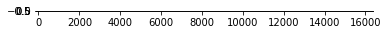

In [0]:
data=torch.from_numpy(np.random.random((1000,1,16384)))
data_labels=torch.from_numpy(np.random.randint(10,size=1000))
print(data.shape,type(data))
plt.imshow(data[1])

In [0]:
train,test=data[:800,:],data[800+1:,:]
train_labels,test_labels=data_labels[:800],data_labels[800+1:]
print("train:",train.shape,train_labels.shape,'\n',"test:",test.shape,test_labels.shape)
model_prep(train,test,train_labels,test_labels)

#MULTICLASSIFICATION


In [0]:
pip install gwpy lalsuite Pycbc

In [0]:
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
from tqdm import tqdm
#-------------------------
#       Deep learning
#import torch.nn as nn 
#import torch 
#import torchvision.datasets as dsets
#from torch.utils.data import Dataset, DataLoader
#import torch.optim as optim
#---Data reading and writing---------------
import csv
import h5py
import pandas as pd
from scipy import signal
import scipy.io.wavfile as s
import matplotlib.pyplot as plt


In [0]:
signal_gw=np.zeros((60000,16384))
next_val=0

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
a=['5','10','15','20','5','10','15','20','50','100','150','200','250','300','350','400','450','500','.5','.8','.5','.5','.8','.5','60','80','120','50','UIE','CIE','250','260','270','280','Glitch','I','II','III','10','20','30','30','60']
print(len(a))

43


In [0]:
next_val=0
#------------------------------------------------------------------
#                    TRAINING DATASETS PREPRATION               ---
#------------------------------------------------------------------

class dataprep_train:

#------------------------------------------------------------------
#                    SIMULATED SIGNALS+TRANSIENT NOISE
#------------------------------------------------------------------
  def simulated_signals(noise):  
    global next_val,signal_gw
    apx=['TaylorT1', 'TaylorT2', 'SpinTaylorT4','SpinTaylorT5']#,'EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2','IMRPhenomB']
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for a in tqdm(range(len(apx))):
        check=np.zeros(noise.shape[1])
        k=0
        spin1x,spin1y,spin1z,spin2x,spin2y,spin2z=0,0,0,0,0,0
        if apx=='TaylorT1':
          for m1 in range(5,21,5):
            for m2 in range(5,21,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)

        elif apx=='TaylorT2':
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    
        elif apx=='SpinTaylorT4' or apx=='SpinTaylorT5':
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      spin1x=0.5,spin1y=0.8,spin1z=0.5,
                                      spin2x=0.5,spin2y=0.8,spin2z=0.5,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
          
        elif apx=='EOBNRv2' or apx=='SEOBNRv1' or apx=='SEOBNRv2':
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
        else:
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    if len(hp)<=16385:
                      signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
                      pos=np.random.randint(0,noise.shape[1]-len(hp))
                      signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(hp)]+=hp
                      writer = csv.writer(file)
                      for i in range(noise.shape[0]):
                        col=np.zeros(43)
                        if apx=='SpinTaylorT4' or apx=='SpinTaylorT5':
                          col[m1//5],col[3+m2//4],col[7+d//50],col[18],col[19],col[20],col[21],col[22],col[23],col[23+fl//40],col[27]=1,1,1,1,1,1,1,1,1,1,1
                        else:
                          col[m1//5],col[3+m2//4],col[7+d//50],col[23+fl//40],col[27]=1,1,1,1,1
                        writer.writerow(col)
                      k=k+1
                      next_val+=(noise.shape[0])
                    
#------------------------------------------------------------------
#                    ECHOES +TRANSIENT NOISE
#------------------------------------------------------------------
  def echoes(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for loop in tqdm(range(2)):##############################50
        t=np.linspace(0,.3,np.random.randint(16384))
        y1,y2=np.zeros(len(t)),np.zeros(len(t))
        i=0
        for j in range(8):
          for f in [250,260,270,280]:
            for i in range(len(t)):
              aa=t[i]-0.0295-j*0.0295
              y1[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*f*aa)
            pos=np.random.randint(0,noise.shape[1]-len(t))
            signal_gw[next_val:next_val+noise.shape[0]-1,pos:pos+len(t)]+=y1
            next_val+=(noise.shape[0])
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(43)
              col[28],col[29+(f//10)-24]=1,1
              writer.writerow(col)

        r=.3
        for j in range(8):
          for f in [250,260,270,280]:
            for i in range(len(t)):
              aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
              y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*f*aa)
            pos=np.random.randint(0,noise.shape[1]-len(t))
            signal_gw[next_val:next_val+noise.shape[0]-1,pos:pos+len(t)]+=y2
            next_val+=(noise.shape[0])
            writer = csv.writer(file)          
            for i in range(noise.shape[0]):
                  col=np.zeros(43)
                  col[29],col[29+(f//10)-24]=1,1
                  writer.writerow(col)

#------------------------------------------------------------------
#                    GLITCHES+TRANSIENT NOISE
#------------------------------------------------------------------
  def glitches(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for i in tqdm(['helix2','whistle','wandering_line','violin_mode','Tomte']):#,'koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']):
        loc='gdrive/My Drive/GW data/Glitches/'+i+'.wav'
        rate,data=s.read(loc)
        for c1 in range(5,9):
          for c2 in range(3,13,2):
            b, a = signal.butter(c1, .9, btype='lowpass', analog=False)
            low_passed = signal.filtfilt(b, a, data)
            y = 10e-28*signal.medfilt(low_passed,c2)
            k=np.zeros(8820)
            j=0
            for i in range(0,len(y),5):
              k[j]=y[i]
              j+=1
            pos=np.random.randint(0,noise.shape[1]-len(k))
            signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(k)]+=k
            next_val+=(noise.shape[0])
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(43)
              col[34]=1
              writer.writerow(col)

#------------------------------------------------------------------------------
#                             CCSNe+Transient Noise               -------------
#------------------------------------------------------------------------------
  def ccsne(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat','signal_A1B2G1_R.dat','signal_A1B3G1_R.dat']#,'signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for aak in tqdm(val):
        loc='gdrive/My Drive/GW data/CCSNe/'+aak
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        for r in [10,20,30]:
          for theta in [30,60]:
            y = 1/8*np.sqrt(15/np.pi)*y/r*(np.sin(theta))**2
            new_arr=np.zeros(16000)
            j=0
            for i in range(0,len(y),5):
              new_arr[j]=y[i]
              j+=1
            pos=np.random.randint(0,noise.shape[1]-len(new_arr))
            signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(new_arr)]+=new_arr
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(43)
              if val=='signal_A2B4G1_R.dat'  or   val=='signal_A3B3G5_R.dat' or  val=='signal_A3B5G4_R.dat' :
                col[37]=1
              elif val=='signal_A3B3G1_R.dat'  or val=='signal_A3B4G2_R.dat':
                col[36]=1
              elif val=='signal_A3B3G2_R.dat' or  val=='signal_A3B3G3_R.dat' or  val=='signal_A4B2G2_R.dat' or  val=='signal_A4B2G3_R.dat' or  val=='signal_A4B4G4_R.dat' or  val=='signal_A4B4G5_R.dat' or  val=='signal_A4B5G4_R.dat' or  val=='signal_A4B5G5_R.dat':
                col[36],col[35]=1,1
              else:
                col[35]=1
              col[37+r//10],col[40+theta//30]=1,1
              writer.writerow(col)
            next_val=next_val+noise.shape[0]    

#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_BHBNSB(noise):
    global next_val,signal_gw
    apx=['TaylorT1', 'TaylorT2', 'SpinTaylorT4', 'SpinTaylorT5']#,'EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2','IMRPhenomB']
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for a in tqdm(range(len(apx))):
        check=np.zeros(noise.shape[1])
        k=0
        spin1x,spin1y,spin1z,spin2x,spin2y,spin2z=0,0,0,0,0,0
        if apx=='TaylorT1':
          for m1 in range(5,21,5):
            for m2 in range(5,21,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)

        elif apx=='TaylorT2':
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    
        elif apx=='SpinTaylorT4' or apx=='SpinTaylorT5':
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [60,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      spin1x=0.5,spin1y=0.8,spin1z=0.5,
                                      spin2x=0.5,spin2y=0.8,spin2z=0.5,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
          
        elif apx=='EOBNRv2' or apx=='SEOBNRv1' or apx=='SEOBNRv2':
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
        else:
          for m1 in range(5,16,5):
            for m2 in range(5,16,5):
              for d in range(50,501,50):
                for fl in [40,80,120]:
                  if (m1+m2+d+fl) not in check:
                    check[k]=m1+m2+d+fl
                    hp,hc = get_td_waveform(approximant=apx[a],
                                      mass1=m1,mass2=m2,
                                      delta_t=1.0/4096,
                                      f_lower=fl,f_final=50, 
                                      distance=d)
                    if len(hp)<=16385:
                      for loops in range(2):
                        t=np.linspace(0,.3,np.random.randint(16384))
                        y2=np.zeros(len(t))          
                        r=.3
                        for j in range(3):
                          for i in range(len(t)):
                            aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
                            y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*250*aa)

                          #for wave in ['helix2']:#,'whistle','wandering_line','violin_mode','Tomte']):#,'koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']):
                          #  loc='gdrive/My Drive/GW data/Glitches/'+wave+'.wav'
                          #  rate,data=s.read(loc)
                          #  for c1 in range(5,9):
                          #    for c2 in range(3,13,2):
                          #      b, a = signal.butter(c1, .9, btype='lowpass', analog=False)
                          #      low_passed = signal.filtfilt(b, a, data)
                          #      y = 10e-28*signal.medfilt(low_passed,c2)
                          #      ss=np.zeros(8820)
                          #      jj=0
                          #      for ii in range(0,len(y),5):
                          #        ss[jj]=y[ii]
                          #        jj+=1

                          signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
                          pos=np.random.randint(0,noise.shape[1]-len(hp)) 
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(hp)]+=hp 
                          pos=np.random.randint(0,noise.shape[1]-len(y2))
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(y2)]+=y2
                          pos=np.random.randint(0,noise.shape[1]-len(sig))
                          writer = csv.writer(file)
                          for i in range(noise.shape[0]):
                            col=np.zeros(43)
                            if apx=='SpinTaylorT4' or apx=='SpinTaylorT5':
                              col[m1//5],col[3+m2//4],col[7+d//50],col[18],col[19],col[20],col[21],col[22],col[23],col[23+fl//40],col[27]=1,1,1,1,1,1,1,1,1,1,1
                            else:
                              col[m1//5],col[3+m2//4],col[7+d//50],col[23+fl//40],col[27]=1,1,1,1,1
                            writer.writerow(col)
                          k=k+1
                          next_val+=(noise.shape[0])
                                #for i in range(noise.shape[0]):
                                #  col=np.zeros(43)
                                #  if apx=='SpinTaylorT4' or apx=='SpinTaylorT5':
                                #    col[m1//5],col[3+m2//4],col[7+d//50],col[18],col[19],col[20],col[21],col[22],col[23],col[23+fl//40],col[27]=1,1,1,1,1,1,1,1,1,1,1
                                #  else:
                                #    col[m1//5],col[3+m2//4],col[7+d//50],col[23+fl//40],col[27]=1,1,1,1,1
                                #  col[29],col[29+(25//10)-24],col[34]=1,1,1
                                #writer.writerow(col)                         




#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_CCSNe(noise):
    global next_val,signal_gw  
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat']#,'signal_A1B2G1_R.dat','signal_A1B3G1_R.dat']#,'signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for aak in val:
        loc='gdrive/My Drive/GW data/CCSNe/'+aak
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        for r in [10,20,30]:
          for theta in [30,60]:
            y = 1/8*np.sqrt(15/np.pi)*y/r*(np.sin(theta))**2
            new_arr=np.zeros(16000)
            j=0
            for i in range(0,len(y),5):
              new_arr[j]=y[i]
              j+=1
            wave=['helix2','whistle']#,'wandering_line','violin_mode','Tomte']:#,'koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']:
            for wave_name in wave: 
              loc='gdrive/My Drive/GW data/Glitches/'+wave_name+'.wav'
              rate,data=s.read(loc)
              for c2 in [5,7]:
                b, a = signal.butter(7, .9, btype='lowpass', analog=False)
                low_passed = signal.filtfilt(b, a, data)
                z = 10e-28*signal.medfilt(low_passed,c2)
                sig=np.zeros(8820)
                jj=0
                for ii in range(0,len(z),5):
                  sig[jj]=z[ii]
                  jj+=1
                signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
                pos=np.random.randint(0,noise.shape[1]-len(sig)) 
                signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(sig)]+=sig 
                pos=np.random.randint(0,noise.shape[1]-len(new_arr))
                signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(new_arr)]+=new_arr                              
                writer = csv.writer(file)
                for i in range(noise.shape[0]):
                  col=np.zeros(43)
                  if val=='signal_A2B4G1_R.dat' or  val=='signal_A3B3G5_R.dat' or  val=='signal_A3B5G4_R.dat' :
                    col[37]=1
                  elif val=='signal_A3B3G1_R.dat' or val=='signal_A3B4G2_R.dat':
                    col[36]=1
                  elif val=='signal_A3B3G2_R.dat' or  val=='signal_A3B3G3_R.dat' or  val=='signal_A4B2G2_R.dat' or  val=='signal_A4B2G3_R.dat' or  val=='signal_A4B4G4_R.dat' or  val=='signal_A4B4G5_R.dat' or  val=='signal_A4B5G4_R.dat' or  val=='signal_A4B5G5_R.dat':
                    col[36],col[35]=1,1
                  else:
                    col[35]=1
                  col[34],col[37+r//10],col[40+theta//30]=1,1,1
                  writer.writerow(col)
                next_val+=noise.shape[0]



#----------------------------------------------------------------------------------
#                               PIPELINES                                       ---
#----------------------------------------------------------------------------------
def train_pipeline(noise):
  global next_val,signal_gw
  val=dataprep_train
  with open('gdrive/My Drive/GW data/labels.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['5','10','15','20','5','10','15','20','50','100','150','200','250','300','350','400','450','500','.5','.8','.5','.5','.8','.5','60','80','120','50','UIE','CIE','250','260','270','280','Glitch','I','II','III','10','20','30','30','60'])
  print('\nSimulated GW .......')    
  val.simulated_signals(noise)
  print('\nSimulated GW training set 100%')
  print('data size :'+ str(next_val)+'\n\n')  
  print('\nEchoes...')
  val.echoes(noise)
  print('data size :'+ str(next_val)+'\n\n')
  print('\nEchoes 100%')
  print('\nCCSNE...')  
  val.ccsne(noise)
  print('data size :'+ str(next_val)+'\n\n')
  print('\nCCSNE 100%')
  print('\nGlitches...')    
  val.glitches(noise)
  print('data size :'+ str(next_val)+'\n\n')  
  print('\nGlitches 100%')  
  print('\nMixed training BHBNSB ...' )
  val.mixed_signals_BHBNSB(noise)
  print('\nMixed set BHBNSB 100%')
  print('data size :'+ str(next_val)+'\n\n')
  print('\nMixed training CCSNe...' )
  val.mixed_signals_CCSNe(noise)
  print('\nMixed set CCSNe 100%')
  print('data size :'+ str(next_val)+'\n\n')  
  #hf = h5py.File('gdrive/My Drive/GW data/dataset.h5', 'w')
  #hf.create_dataset('dataset', data=signal_gw)
  #hf.close()

In [0]:
#--------------------------------------------------------
#                           MAIN                    -----
#--------------------------------------------------------
#if __name__ == '__main__':
  #global next_val
  #print('\nCollecting noise.....\n data size : '+str(next_val))
hf= h5py.File('gdrive/My Drive/GW data/noise.h5', 'r')
group_key = list(hf.keys())[0]
noise= hf[group_key]
noise=np.array(noise)
print(noise.shape,type(noise))
hf.close()

(70, 16384) <class 'numpy.ndarray'>


In [0]:
noise=noise[:5]

In [0]:
noise.shape

In [0]:
print('\n\nPreparing data..... ')
train_pipeline(noise) #--------training-------------#
print('\nPreparing data........100%\n\n')

In [0]:
labels=pd.read_csv('gdrive/My Drive/GW data/labels.csv')
labels.shape

In [0]:
next_val

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
data=signal_gw[:next_val]
print(data.shape)
data=data.reshape((next_val,16384,1))
print(data.shape)

(14790, 16384)
(14790, 16384, 1)


In [0]:
labels=pd.read_csv('gdrive/My Drive/GW data/labels.csv')
labels.head

<bound method NDFrame.head of          5   10   15   20  5.1  10.1  ...  III  10.2  20.2   30  30.1  60.1
0      0.0  1.0  0.0  0.0  1.0   0.0  ...  0.0   0.0   0.0  0.0   0.0   0.0
1      0.0  1.0  0.0  0.0  1.0   0.0  ...  0.0   0.0   0.0  0.0   0.0   0.0
2      0.0  1.0  0.0  0.0  1.0   0.0  ...  0.0   0.0   0.0  0.0   0.0   0.0
3      0.0  1.0  0.0  0.0  1.0   0.0  ...  0.0   0.0   0.0  0.0   0.0   0.0
4      0.0  1.0  0.0  0.0  1.0   0.0  ...  0.0   0.0   0.0  0.0   0.0   0.0
...    ...  ...  ...  ...  ...   ...  ...  ...   ...   ...  ...   ...   ...
14785  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   0.0  1.0   0.0   1.0
14786  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   0.0  1.0   0.0   1.0
14787  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   0.0  1.0   0.0   1.0
14788  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   0.0  1.0   0.0   1.0
14789  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   0.0  1.0   0.0   1.0

[14790 rows x 43 columns]>

In [0]:
labels=labels.to_numpy(dtype=int,copy=True)

In [0]:
labels.shape

(14790, 43)

In [0]:
graph=np.sum(labels,axis=1)

(array([  500.,     0.,   640.,     0.,     0.,    90.,     0.,
          120.,     0., 13440.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

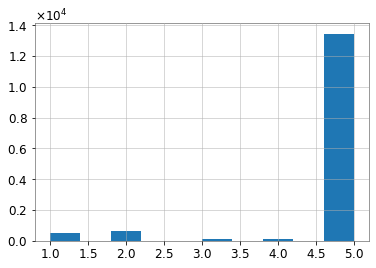

In [0]:
plt.hist(graph)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=2, test_size=0.2)

In [0]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(11832, 16384, 1) (11832, 43) (2958, 16384, 1) (2958, 43)


In [0]:
model = Sequential()
model.add(Conv1D(filters=8,   kernel_size=5, activation="relu", input_shape=(X_train.shape[1],1)))
model.add(Conv1D(filters=16,  kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=32,  kernel_size=5, activation='relu',padding='valid',use_bias='True'))
model.add(Conv1D(filters=64,  kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=128, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=256, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=256, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=256, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=256, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=256, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=256, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=128, kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=64,  kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=32,  kernel_size=5, activation="relu",padding='valid',use_bias='True'))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(43, activation='sigmoid'))

In [0]:
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
a=model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=10)

Train on 11832 samples, validate on 2958 samples
Epoch 1/100
11832/11832 [==============================] - 1632s 138ms/step - loss: 13.4197 - accuracy: 0.0104 - val_loss: 13.1728 - val_accuracy: 0.0000e+00
Epoch 2/100
11830/11832 [============================>.] - ETA: 0s - loss: 13.1875 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [0]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: ignored